In [1]:
from datetime import date

today = date.today()
filecount = 1

---
## Calculate prime number until a given number
- Change 'count' variable to change given number
---

In [2]:
from tqdm import trange
from time import time

count = 10000 # <---- Change this !
primes = []
start = time()


for j in range(1, count):
    isprime = False
    for i in range(2, j):
        if (j % i) == 0:
            isprime = True
            break
    if not isprime:
        primes.append(j)

end = time()
print(f"Calc time: {end - start :.2f} sec")
print(f"I found  : {len(primes)} number")
print(f"Last  5: {primes[-5:]}")
print(primes[:5], primes[-5:])

Calc time: 0.71 sec
I found  : 1230 number
Last  5: [9931, 9941, 9949, 9967, 9973]
[1, 2, 3, 5, 7] [9931, 9941, 9949, 9967, 9973]


---
### Print prime numbers to a file
```sh
$ > data_{today}_{count}_{filecount}.txt
```
---

In [3]:
filename = "data" + "_" + str(today) + "_" + str(count)+ "_" + str(filecount) + ".txt"
calctime = end - start
from tqdm import tqdm
with open("%s" %filename, 'w+') as output:
    output.write("Calc until: %s\n" % count)
    output.write("Calc time : {:.3f}\n".format(calctime))
    for i in primes:
        output.write("%s\n" % i)
output.close()
filecount += 1
print(f"\nThe file was successfully written as '{filename}'")


The file was successfully written as 'data_2021-10-02_10000_1.txt'


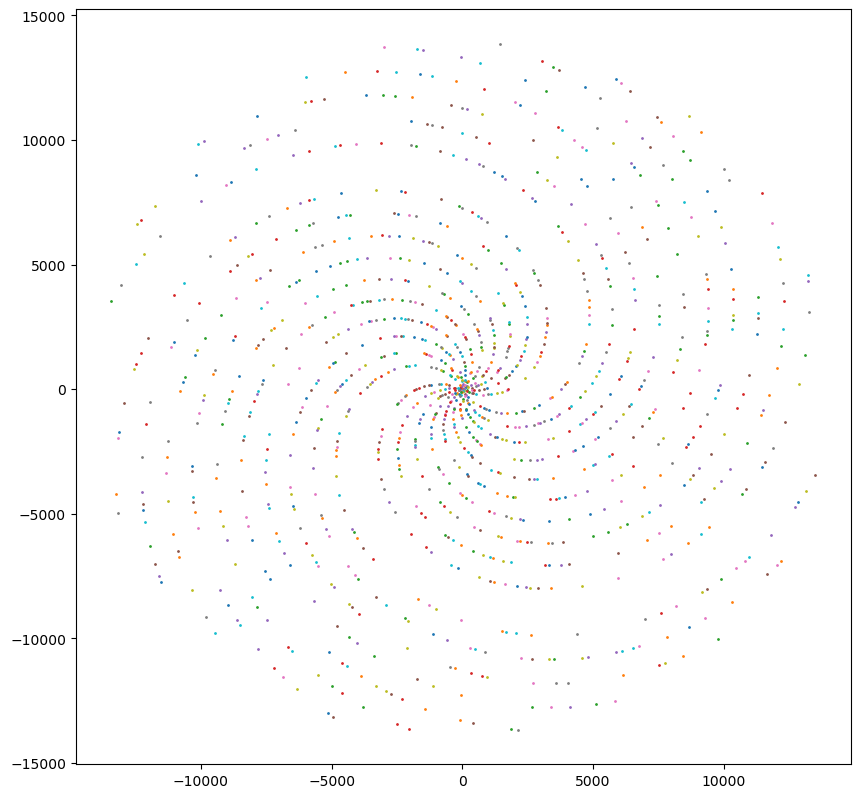

In [4]:
# print(primes[-5:])
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=100)

###############################################################################
# Source: Mark Dickinson
# https://stackoverflow.com/questions/34372480/rotate-point-about-another-point-in-degrees-python/34374437
###############################################################################
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy
###############################################################################

origin = (0, 0)

for x, nums in enumerate(primes):
#     print(nums)
    point = (primes[x], primes[x])
    qx, qy = rotate(origin, point, primes[x])
    plt.scatter(qx, qy, s = 1)
    
plt.show()
